In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

!pwd

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv
/kaggle/working


# Kaggle Copy 3.
캐글 필사 3. 바이크 쉐어 요구 연습문제 for Aiffel 
이것은 [이 노트북 by hwangmuseong](https://www.kaggle.com/code/hwangmuseong/bike-sharing-demand-practice-for-aiffel?rvi=1)의 카피이며 Kaggle의 [Playground prediction competition](https://www.kaggle.com/competitions/bike-sharing-demand/data) 데이터를 사용합니다

# 1.1. 데이터 둘러보기
먼저 데이터를 불러들이고, 간단히 데이터를 살펴봅니다.

In [2]:
#path of data
data_path = os.pardir+'/input/bike-sharing-demand/'
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.shape, test.shape, submission.shape

((10886, 12), (6493, 9), (6493, 2))

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 데이터 살펴보기
info()메서드를 사용해서 데이터프레임의 정보를 확인해 보았습니다. 일단 int64, float64는 처리할 수 있을 것 같은데 datetime은 따로 처리를 해야 할 것 같네요. 사실 이것에 관해서는 LMS에서 이미 parsing을 해보았는데요 일단 따라가보겠습니다. test, train데이터셋의 column은 세 개가 차이납니다. count가 target label인데, 이것은 casual과 registered의 합으로 보입니다. 아무튼 노트북을 따라가보겠습니다.

# 1.2. 더 효과적인 분석을 위한 피쳐 엔지니어링

In [9]:
print(train['datetime'][100])
print(train['datetime'][100].split())
print(train['datetime'][100].split())

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
['2011-01-05', '09:00:00']


In [10]:
print(train['datetime'][100].split()[0].split('-'))
print(train['datetime'][100].split()[1].split(':'))

['2011', '01', '05']
['09', '00', '00']


## 날짜, 시간 feature생성
LMS EXP2 node에서는 pandas의 DatetimeIndex를 사용했는데, 여기서는 이미 숫자 단위로 데이터를 나누었기 때문에 그대로 쓰면 되겠습니다. 여기에서는 apply method를 사용하고 있습니다. 날짜를 합친 feature는 용도를 알 수 없기 때문에 일단 생성하지 않겠습니다.

In [11]:
date_cols=['year','month','day']
time_cols=['hour','minute','second']
#does apply method apply 'self' as iterable of lambda function?
for i in range(3):
    train[date_cols[i]]=train.datetime.apply(lambda x:x.split()[0].split('-')[i])
    train[time_cols[i]]=train.datetime.apply(lambda x:x.split()[1].split(':')[i])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,month,minute,day,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,00,01,00,01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,00,01,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,02,01,00,01,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,03,01,00,01,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,04,01,00,01,00


In [12]:
from datetime import datetime
import calendar
#it is revealed that date is used to extract weekday. Let's just follow skipped things
train['date']=train.datetime.apply(lambda x:x.split()[0])
print(train['date'])

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
10881    2012-12-19
10882    2012-12-19
10883    2012-12-19
10884    2012-12-19
10885    2012-12-19
Name: date, Length: 10886, dtype: object


In [13]:
#help(datetime.strptime) #checked help on strptime method - strptime returns 'datetime' parsed from a string.
print(type(datetime.strptime(train['date'][100], '%Y-%m-%d'))) #maybe 'datetime' is a class of datetime package
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) #not a regular expression.... maybe
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()]) #print 'day of the week' string


<class 'datetime.datetime'>
2011-01-05 00:00:00
2
Wednesday


In [14]:
train['weekday'] = train['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').weekday())
print(train['weekday'])
train['weekday'][100:] #made weekday column succesfuly....

0        5
1        5
2        5
3        5
4        5
        ..
10881    2
10882    2
10883    2
10884    2
10885    2
Name: weekday, Length: 10886, dtype: int64


100      2
101      2
102      2
103      2
104      2
        ..
10881    2
10882    2
10883    2
10884    2
10885    2
Name: weekday, Length: 10786, dtype: int64

### 요일 처리
굳이 요일을 string으로 저장하지는 않았습니다. 나중에 바꿔주기가 어려울 것 같지도 않고요. 하지만 요일을 확인하는 작업은 필요한 것이었습니다. 일주일의 시작을 월요일로 하는지 일요일로 하는지 모르기 때문입니다. 여기에서 수요일이 2인 것으로 볼때 월요일을 0으로 시작하는 값이 반환됐다고 확신할 수 있겠습니다. 물론 weekday() method의 설명을 확인해도 알 수 있겠죠

In [15]:
help(datetime.weekday) #it's description shows that monday is 0 and sunday is 6.

Help on method_descriptor:

weekday(...)
    Return the day of the week represented by the date.
    Monday == 0 ... Sunday == 6



In [16]:
train['season'] = train['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear', 2: 'Mist, Few clouds', 3: 'Light Snow, Rain, Thunder', 4: 'Heavy Snow, Rain, Thunder'})
print(train.head())
#help(pd.Series.map)

              datetime  season  holiday  workingday weather  temp   atemp  \
0  2011-01-01 00:00:00  Spring        0           0   Clear  9.84  14.395   
1  2011-01-01 01:00:00  Spring        0           0   Clear  9.02  13.635   
2  2011-01-01 02:00:00  Spring        0           0   Clear  9.02  13.635   
3  2011-01-01 03:00:00  Spring        0           0   Clear  9.84  14.395   
4  2011-01-01 04:00:00  Spring        0           0   Clear  9.84  14.395   

   humidity  windspeed  casual  registered  count  year hour month minute day  \
0        81        0.0       3          13     16  2011   00    01     00  01   
1        80        0.0       8          32     40  2011   01    01     00  01   
2        80        0.0       5          27     32  2011   02    01     00  01   
3        75        0.0       3          10     13  2011   03    01     00  01   
4        75        0.0       0           1      1  2011   04    01     00  01   

  second        date  weekday  
0     00  2011-01-

### pandas.Series.map() method
뭔지 잘 모르는 것이 나왔으니 잠깐 살펴봅니다. 새로운 포맷의 데이터를 만드는데 유용해 보이는 예시들이 많이 나와있네요. 그런데 변환하려고 나왔다는 것이 분명해 보이니까 변환이 잘 됐는지 unique() method, isna() method로 확인하겟습니다.

In [17]:
train['weather'].unique(), train['season'].unique(), train['weather'].isna().all(), train['season'].isna().any()

(array(['Clear', 'Mist, Few clouds', 'Light Snow, Rain, Thunder',
        'Heavy Snow, Rain, Thunder'], dtype=object),
 array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object),
 False,
 False)

# 1.3. 데이터 시각화

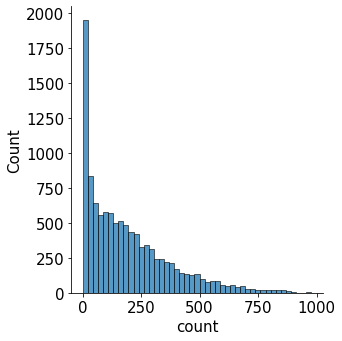

In [18]:
import seaborn as sns
import matplotlib as mpl
#import mpl.pyplot as plt #ErrorNote
import matplotlib.pyplot as plt
%matplotlib inline

#plot distrubution (speed up from this point because of deadline)
mpl.rc('font', size = 15) #set font size
sns.displot(train['count']) #plot distribution

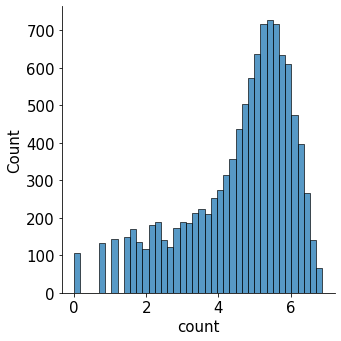

In [19]:
sns.displot(np.log(train['count'])) #log scaled count. log(1) is 0. (remember log(0) is -inf)

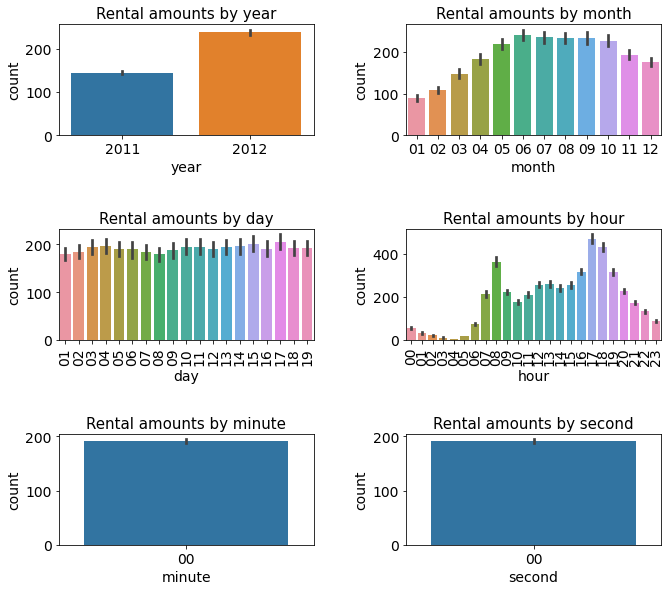

In [20]:
#bar plot
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15) #set title size of plots
figure, axes = plt.subplots(nrows = 3, ncols=2)
plt.tight_layout() #set margins between graphs
figure.set_size_inches(10,9)

#step 2. draw(assign) subplots, count accroding to year/ month etc.,
sns.barplot(x = 'year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month',y='count',data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train, ax=axes[2,1])

#set title for subplots
axes[0,0].set(title='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

#rotate axis labels of horizontal axis
axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

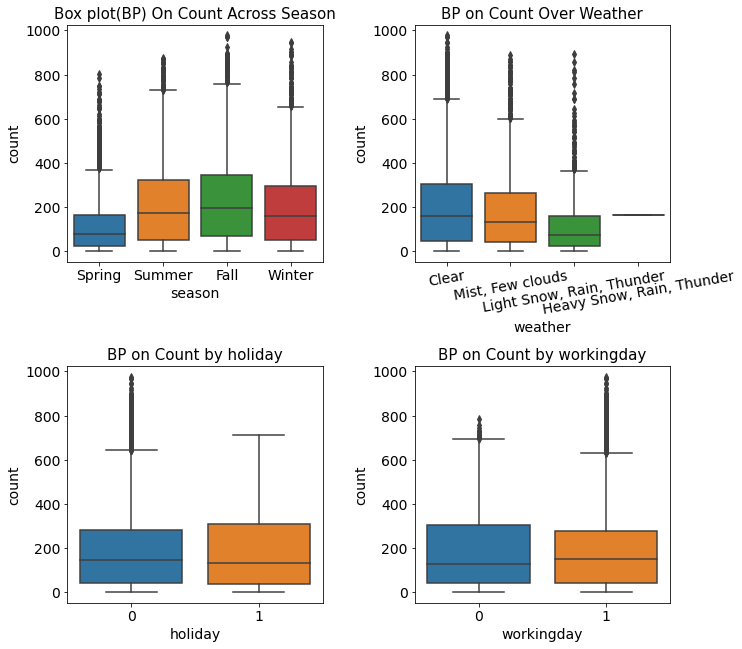

In [21]:
#box plot
figure, ax=plt.subplots(nrows = 2, ncols = 2) #2 by 2
plt.tight_layout()
figure.set_size_inches(10,10)

#assign(draw) subplots, counts per season, weather, holiday, workingday
sns.boxplot(x='season', y='count', data=train, ax=ax[0,0])
sns.boxplot(x='weather', y='count', data=train, ax=ax[0,1])
sns.boxplot(x='holiday', y='count', data=train, ax=ax[1,0])
sns.boxplot(x='workingday', y='count', data=train, ax=ax[1,1])

#set titles
ax[0,0].set(title='Box plot(BP) On Count Across Season')
ax[0,1].set(title='BP on Count Over Weather')
ax[1,0].set(title='BP on Count by holiday')
ax[1,1].set(title='BP on Count by workingday')

#it solves interference between horizontal labels
ax[0,1].tick_params('x', labelrotation = 10) 

### Box Plot에 대한 해설
박스 가운데 선은 중앙값 (줄세웠을때 중간에 있는 샘플의 값)입니다. 박스의 위, 아래 바운더리와 바깥의 수평선은 사원소수에 의한 것들입니다. 하위 25%, 상위 25%값이 있는 곳이 박스의 위아래 높이이고요, 바깥 선은 사원소수 범위를 1.5배 한 것입니다만 count는 이 끝이기 때문에 여기선 0에 생겼네요. 바깥의 점들은 1.5사원소수 범위에서 벗어난, outlier로 취급할만한 값들입니다

<AxesSubplot:xlabel='hour', ylabel='count'>

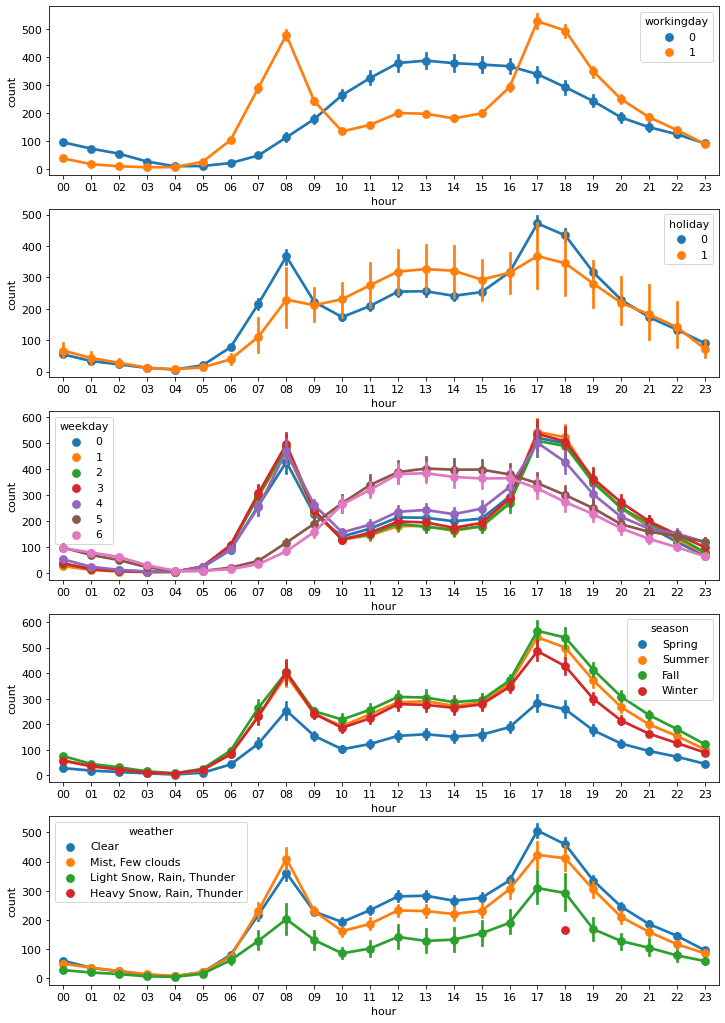

In [22]:
#point plot
mpl.rc('font', size=11)
fig, ax=plt.subplots(5,1)
fig.set_size_inches(12,18)

#subplots assigned.
#mean counts over hour versus workingday/holiday/weekday/season/weather
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=ax[0]) #was this average?
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=ax[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=ax[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=ax[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=ax[4])


<AxesSubplot:xlabel='humidity', ylabel='count'>

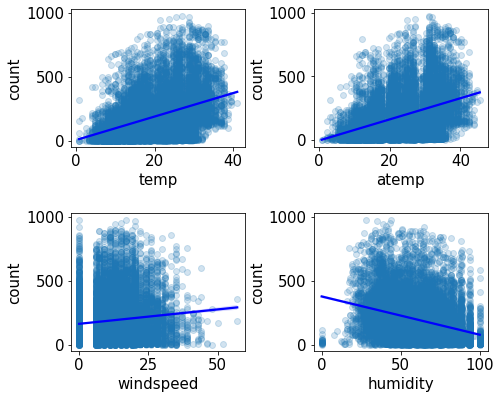

In [23]:
#scatter plot with regression line
mpl.rc('font', size=15)
fig, ax = plt.subplots(2,2)
plt.tight_layout()
fig.set_size_inches(7,6)

#assign(draw) subplots
#count versus temp, atemp(wind chill temperature), windspeed, humidity
sns.regplot(x='temp', y='count', data=train, ax=ax[0,0], scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=ax[0,1], scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=ax[1,0], scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=ax[1,1], scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})



In [24]:
#heatmap
train[['temp','atemp','humidity','windspeed','count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

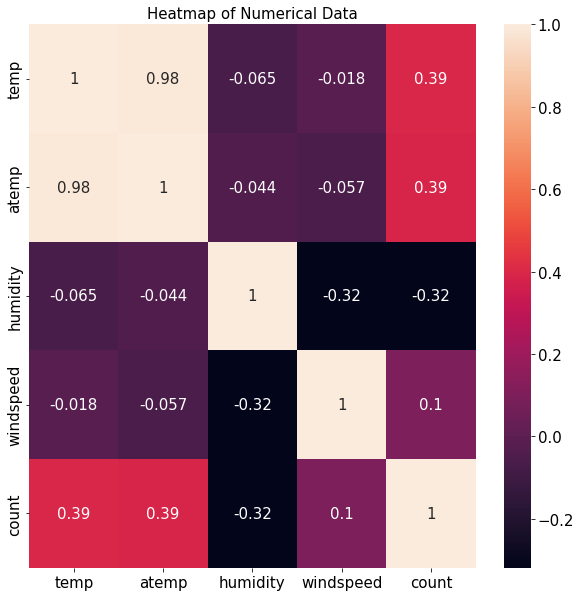

In [25]:
#correlation matrix between features
corrMat = train[['temp','atemp','humidity','windspeed','count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, annot=True) #heatmap, include annotation (value of correlation)
ax.set(title='Heatmap of Numerical Data')

# 자전거 대여 수요 예측 경진대회 베이스라인 모델
- 메뉴: [Run]->[Stop Session]후 여기서부터 실행 권장.(필수 아님)

In [26]:
import pandas as pd
data_path = '../input/bike-sharing-demand/'
train = pd.read_csv(data_path+'train.csv')
test=pd.read_csv(data_path + 'test.csv')
submission=pd.read_csv(data_path+'sampleSubmission.csv')

## 2.1. Feature Engineering

remove outliers

In [27]:
#from train data, extract weather is not 4

train=train[train['weather']!=4]

In [28]:
all_data_tmp=pd.concat([train,test])
all_data_tmp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [29]:
all_data = pd.concat([train,test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


### Derived Features

In [30]:
from datetime import datetime
date_cols=['year','month']

for i in range(2):
    all_data[date_cols[i]]=all_data.datetime.apply(lambda x:x.split()[0].split('-')[i])

all_data['hour']=all_data.datetime.apply(lambda x:x.split()[1].split(':')[0])
all_data['date']=all_data.datetime.apply(lambda x:x.split()[0])
all_data['weekday'] = all_data['date'].apply(lambda dateString:datetime.strptime(dateString, '%Y-%m-%d').weekday())
all_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,date,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,01,00,2011-01-01,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,01,01,2011-01-01,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,01,02,2011-01-01,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,01,03,2011-01-01,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,01,04,2011-01-01,5


In [31]:
#drop columns
drop_features = ['casual','registered','datetime','date','windspeed','month']
all_data = all_data.drop(drop_features, axis=1)

In [32]:
#separate train, test data
X_train = all_data[~pd.isnull(all_data['count'])] #Q)does '~' work like 'not'? '~'
X_test = all_data[pd.isnull(all_data['count'])]

#separate count
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)
y=train['count']

In [33]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


## 2.2. 평가지표 계산 함수 작성

In [34]:
import numpy as np

def rmsle(y_true, y_pred, convert_exp=True):
    #convert to exponentials
    if convert_exp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
    #convert by log function, return nan values as 0
    log_true = np.nan_to_num(np.log(y_true+1)) #Q) so wha
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    #calculate RMSLE (RMSLE = Root Mean Squared Log Error)
    output = np.sqrt(np.mean((log_true-log_pred)**2))
    return output

## 2.3. 모델 훈련

In [35]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
log_y = np.log(y) #log of target values
linear_reg_model.fit(X_train, log_y)

LinearRegression()

## 2.4. 모델 성능 검증/평가

In [36]:

preds = linear_reg_model.predict(X_train)

In [37]:
print(f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')#f-string      

선형회귀의 RMSLE 값 : 1.0205


## 2.5 predic and submit

In [38]:
linearreg_preds = linear_reg_model.predict(X_test) #prediction with test data
submission['count']=np.exp(linearreg_preds) #take exponential
submission.to_csv('baseline_submission.csv',index=False)

제출&평가 점수 받기.

# 3. Bicycle Share demand prediction competition model - boost performance

In [39]:
import pandas as pd
data_path = '../input/bike-sharing-demand/'
train=pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path+'test.csv')
submission=pd.read_csv(data_path+'sampleSubmission.csv')

### Feature engineering
__remove outliers__ 

In [40]:
train=train[train['weather']!=4] #exclude weather = 4 samples

#concat train, test data
all_data=pd.concat([train, test],ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


### add Derived Features 

In [41]:
from datetime import datetime
date_cols=['year','month']

for i in range(2):
    all_data[date_cols[i]]=all_data.datetime.apply(lambda x:x.split()[0].split('-')[i])

all_data['hour']=all_data.datetime.apply(lambda x:x.split()[1].split(':')[0])
all_data['date']=all_data.datetime.apply(lambda x:x.split()[0])
all_data['weekday'] = all_data['date'].apply(lambda dateString:datetime.strptime(dateString, '%Y-%m-%d').weekday())
all_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,date,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,01,00,2011-01-01,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,01,01,2011-01-01,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,01,02,2011-01-01,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,01,03,2011-01-01,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,01,04,2011-01-01,5


### delete columns

In [42]:
drop_features = ['casual','registered','datetime','date','windspeed','month']
all_data = all_data.drop(drop_features, axis=1)

In [43]:
#separate train, test data
X_train = all_data[~pd.isnull(all_data['count'])] #Q&A)does '~' work like 'not'? yes!'~'
X_test = all_data[pd.isnull(all_data['count'])]

#separate count
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)
y=train['count']

In [44]:
#evaluation score function
import numpy as np

def rmsle(y_true, y_pred, convert_exp=True):
    #convert to exponentials
    if convert_exp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
    #convert by log function, return nan values as 0
    log_true = np.nan_to_num(np.log(y_true+1)) #Q) so wha
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    #calculate RMSLE (RMSLE = Root Mean Squared Log Error)
    output = np.sqrt(np.mean((log_true-log_pred)**2))
    return output

# 3.1. 성능 개선1. 릿지 회귀 모델
### 3.1.1. optimize hyper parameters (train)

In [45]:
#import and assign model
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

#set Grid Search object
#hyper parameters
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

#evaluation function for cross validation(RMSLE score)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better = False)
#gridsearch(with Ridge) object
gridsearch_ridge_model = GridSearchCV(estimator = ridge_model,
                                     param_grid = ridge_params,
                                     scoring=rmsle_scorer, 
                                     cv=5) #fold number of cross validation

#fit by gridsearch
log_y = np.log(y) #log of target
gridsearch_ridge_model.fit(X_train, log_y) #fit (gridsearch)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [46]:
print('optimized hyperparameter :', gridsearch_ridge_model.best_params_)

optimized hyperparameter : {'alpha': 0.1, 'max_iter': 3000}


### 3.1.2. performance check

In [47]:
#prediction
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)
#GridSearchCV.best_estimator_ returns the model object with optimized hyperparameter


#evaluation
print(f'ridge regression RMSLE score : {rmsle(log_y, preds, True):.4f}')

ridge regression RMSLE score : 1.0205


In [48]:
ridge_model_opt=Ridge(alpha=0.1, max_iter=3000)
log_y = np.log(y) #log of target values
ridge_model_opt.fit(X_train, log_y)



Ridge(alpha=0.1, max_iter=3000)

# 3.2. 성능 개선2. 라쏘 회귀 모델
## 3.2.1. 하이퍼 파라미터 최적화(모델 훈련)

In [49]:
from sklearn.linear_model import Lasso
#assign model
lasso_model = Lasso()
#list of hyper parameters
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}

#initialize gridsearch obeject
gridsearch_lasso_model = GridSearchCV(estimator = lasso_model,
                                     param_grid=lasso_params,
                                     scoring=rmsle_scorer,
                                     cv=5)

#grid search
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)
print('optimized hyperparams are :', gridsearch_lasso_model.best_params_)

optimized hyperparams are : {'alpha': 0.00125, 'max_iter': 3000}


## 3.2.2. 성능 검증

In [50]:
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)
print(f'Lasso regression RMSLE score:{rmsle(log_y, preds, True):.4f}')

Lasso regression RMSLE score:1.0205


# 3.3. 성능 개선3 : 랜덤 포레스트 회귀 모델
## 3.3.1. hyper parameter 최적화 (모델 훈련)

In [51]:
from sklearn.ensemble import RandomForestRegressor

#assign model
randomforest_model = RandomForestRegressor()

#initialize gridsearch object
rf_params={'random_state':[42], 
          'n_estimators':[100,120,140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                             param_grid=rf_params,
                                             scoring=rmsle_scorer,
                                             cv=5)

#grid search
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)
print('optimized hyperparameter :', gridsearch_random_forest_model.best_params_)

optimized hyperparameter : {'n_estimators': 140, 'random_state': 42}


## 3.3.2. 모델 성능 검증

In [52]:
#prediction
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

#scoring
print(f'random forest regressor RMSLE score : {rmsle(log_y, preds, True):.4f}')

random forest regressor RMSLE score : 0.1127


## 3.3.3. 예측 및 결과 제출
두 번의 시도와는 다르게, random forest regressor에 대한 hyper parameter 최적화는 RMSLE 스코어를 크게 개선시켰습니다. 필사하는 입장에선 여기가 두 번째 베이스라인이라고 할 수 있겠네요.

Text(0.5, 1.0, 'Predicted Test Data Distribution')

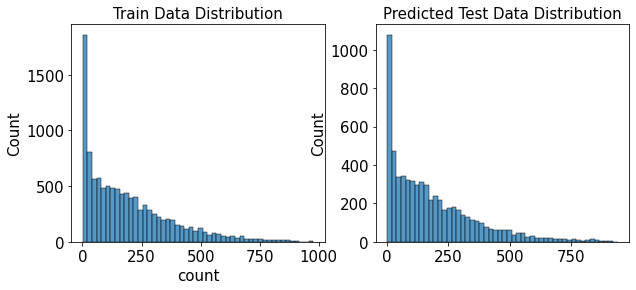

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds=gridsearch_random_forest_model.best_estimator_.predict(X_test)
figure, ax=plt.subplots(1,2)
figure.set_size_inches(10,4)

sns.histplot(y, bins=50, ax=ax[0])
ax[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=ax[1])
ax[1].set_title('Predicted Test Data Distribution')


In [54]:
submission['count']=np.exp(randomforest_preds)
submission.to_csv('second_baseline.csv',index=False)

# 4. Challenge
## 4.1. expand grid of gridsearch
Random Forest Regressor 를 사용했을 때 효과가 좋았는데요, grid를 좀 넓혀보겠습니다.

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pandas as pd
from datetime import datetime




from sklearn.ensemble import RandomForestRegressor

#assign model
randomforest_model = RandomForestRegressor()

#initialize gridsearch object
rf_params={'random_state':[42], 
          'n_estimators':[80, 160, 240]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                             param_grid=rf_params,
                                             scoring=rmsle_scorer,
                                             cv=5)

#grid search
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)
print('optimized hyperparameter :', gridsearch_random_forest_model.best_params_)
#prediction
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

#scoring
print(f'random forest regressor RMSLE score : {rmsle(log_y, preds, True):.4f}')

### 결과 평가

간단히 random forest model의 estimator 숫자를 늘려보았습니다만 160 에서 0.1124로 이전의 0.1127과 거의 같은 결과가 나왔으며, 240개에서 결과를 제치고 160개일 때가 더 좋은 결과를 낸 것을 볼때 140 정도에서 n_estimator에 대한 최적화는 끝난 것 같습니다. 다른 것을 바꿔보는게 좋겠습니다.

## 지금까지 했던 것들 다시 살펴보기
### drop
- month와 windspeed는 drop되었습니다. windspeed는 heatmap의 결과를 보고 drop하기로 결정된 것일까요? month는 season으로 통합됐다고 볼 수 있겠습니다.
- year의 경우 두 개의 값밖에 없습니다. 이것을 가지고 크게 벗어난 다른 시간대에 대해 예측한다는 것은 위험할 수도 있습니다. test데이터에서 year를 살펴보면 좋겠는데 같은 값만 있으니 더 생각 안해도 되겠습니다.

## one-hot encoding을 해 볼 column

In [56]:
X_train.head()


,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


- weekday의 경우 one-hot encoding을 해 보면 괜찮을 것 같습니다. 수요일이 월요일과 금요일의 중간이라고 할 수도 있지만 유니크한 속성이라고 할 수도 있겠죠

- year, hour, season, weather의 경우도 one-hot encoding을 해 볼 가치는 있겠습니다.

In [57]:
print(X_test['year'].unique(), X_train['year'].unique())

['2011' '2012'] ['2011' '2012']


In [58]:
#X_train = pd.get_dummies(X_train, columns=['year', 'hour', 'weather', 'weekday'])
#X_test=pd.get_dummies(X_test, columns=['year', 'hour', 'weather', 'weekday'])
X_train = pd.get_dummies(X_train, columns=['year', 'weather', 'weekday'])
X_test=pd.get_dummies(X_test, columns=['year', 'weather', 'weekday'])

In [59]:
#X_train.drop(['year', 'hour','weather','weekday'], axis=1)
#X_test.drop(['year', 'hour','weather','weekday'], axis=1)

In [60]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'hour',
       'year_2011', 'year_2012', 'weather_1', 'weather_2', 'weather_3',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [61]:
X_train=pd.get_dummies(X_train, columns=['season'])
X_test=pd.get_dummies(X_test, columns=['season'])


In [62]:
X_train.head()

,holiday,workingday,temp,atemp,humidity,hour,year_2011,year_2012,weather_1,weather_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_1,season_2,season_3,season_4
0,0,0,9.84,14.395,81,00,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,9.02,13.635,80,01,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,9.02,13.635,80,02,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,9.84,14.395,75,03,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,9.84,14.395,75,04,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [63]:
from sklearn.ensemble import RandomForestRegressor

randomforest_model_manyoh = RandomForestRegressor(n_estimators=500)

In [64]:
log_y=np.log(y)
randomforest_model_manyoh.fit(X_train,log_y)

preds = randomforest_model_manyoh.predict(X_train)
print(f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')#f-string      

선형회귀의 RMSLE 값 : 0.1120


one - hot encoding을 마구 적용하는 방법은 아무 효과가 없었습니다. 오히려 학습 효율을 떨어뜨린 것인지.... 특히 hour가 너무 많아졌던 것이 아닌가 싶습니다. 이번에는 hour를 빼고 season, year, weekday, weather만 해보니 0.1120으로 아주 조금 나아졌습니다.

In [65]:
X_test.drop('weather_4', axis=1,inplace=True)
predsmy = randomforest_model_manyoh.predict(X_test) #prediction with test data
submission['count']=np.exp(predsmy) #take exponential
submission.to_csv('predsmy_first.csv',index=False)

In [66]:
X_test.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'hour',
       'year_2011', 'year_2012', 'weather_1', 'weather_2', 'weather_3',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'season_1', 'season_2', 'season_3',
       'season_4'],
      dtype='object')

### 제출 결과
0.39627으로 점수가 더 떨어졌습니다! overfitting이 된 것일까요? 그런데 너무 작은 차이라 딱히 큰 의미를 부여하지는 않아도 될 것 같습니다. 다음에는 drop해버린 windspeed를 좀 만져서 넣어보고 싶은데 아쉽게도 데드라인이라 할 수가 없네요.